In [1]:
# Import required libraries to create graphs and getting data from the CSV file

import pandas as pd       # For data manipulation and analysis
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualization
from pathlib import Path  # For handling file path especially for the CSV file holding the dataset


DATA_PATH = Path('heart_2020_recleaned.csv')  # Path to the dataset file

# Setting  display options for pandas to enable better readability of outputs
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 160)

   
# Load the dataset using pandas read_csv and the configured DATA_PATH
df = pd.read_csv(DATA_PATH)
# Print the shape of the loaded DataFrame (rows, columns)
print('Loaded shape:', df.shape)
# Display the first few rows of the DataFrame for inspection
df.head()



Loaded shape: (319795, 18)


,heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
0,No,16.60,Smoker,No,No,3.0,30.0,No,Female,55-59,White,Diabetic,Yes,Very Good,5.0,Yes,No,Yes
1,No,20.34,Non-Smoker,No,Yes,0.0,0.0,No,Female,80 Or Older,White,Non-Diabetic,Yes,Very Good,7.0,No,No,No
2,No,26.58,Smoker,No,No,20.0,30.0,No,Male,65-69,White,Diabetic,Yes,Fair,8.0,Yes,No,No
3,No,24.21,Non-Smoker,No,No,0.0,0.0,No,Female,75-79,White,Non-Diabetic,No,Good,6.0,No,No,Yes
4,No,23.71,Non-Smoker,No,No,28.0,0.0,Yes,Female,40-44,White,Non-Diabetic,Yes,Very Good,8.0,No,No,No


## Boxplot Heart Disease vs Sleep Time

<Figure size 800x600 with 0 Axes>

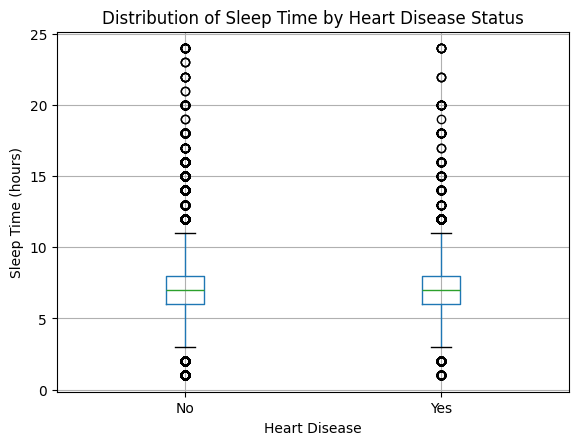

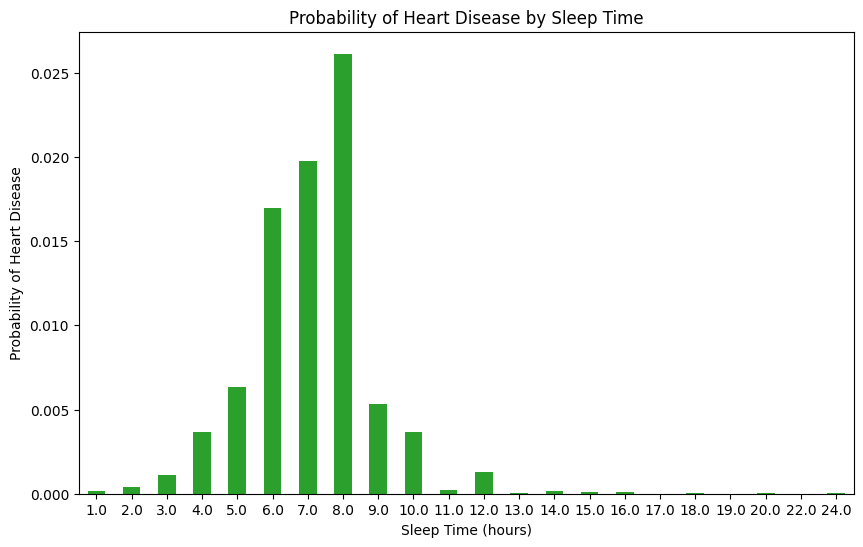

In [ ]:
# Create a boxplot to demosntrate the relationship of sleep time for individuals with and without heart disease

plt.figure(figsize=(8, 6))                          # Set the figure size
df.boxplot(column='sleeptime', by='heartdisease')   # Create a boxplot for sleep time vs with or without heart disease
plt.title('Distribution of Sleep Time by Heart Disease Status')  # Ceate a plot title
plt.suptitle('')                                    # Remove the default title set       
plt.xlabel('Heart Disease')                         # Label the x-axis
plt.ylabel('Sleep Time (hours)')                    # Label the y-axis 
plt.show()



# Calculate probability of heart disease for each sleep time
# Count number of individuals with heart disease for each sleep time
sleep_counts = df[df['heartdisease'] == 'Yes'].groupby('sleeptime').size()
# Count total number of individuals in total
total_counts = len(df)
# Calculate probability
prob_heartdisease = sleep_counts / total_counts

# Plot probability as a bar graph
plt.figure(figsize=(10,6))                              # Set the figure size
prob_heartdisease.plot(kind='bar', color='tab:green')   # Create a bargraph for probability of heart disease by sleep time
plt.xlabel('Sleep Time (hours)')                        # Label the x-axis
plt.ylabel('Probability of Heart Disease')              # Label the y-axis 
plt.title('Probability of Heart Disease by Sleep Time') # Ceate a plot title
plt.xticks(rotation=0)                                  # Rotate x-axis labels for better readability
plt.show()

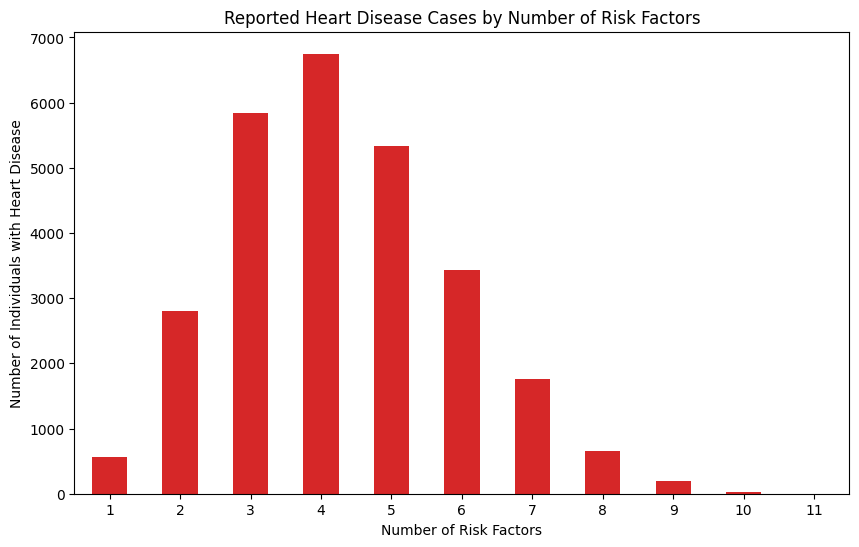

In [4]:
# Plot the number of individuals with heart disease by the number of risk factors for CVD they have

# Defining individuals that have heart disease
df_has_CVD = df[df['heartdisease'] == 'Yes'].copy()

# Define all risk factor columns
risk_factors = ['smoking', 'alcoholdrinking', 'stroke', 'physicalhealth', 'mentalhealth', 
                'diffwalking', 'sex', 'agecategory', 'race', 'diabetic', 'physicalactivity',
                'genhealth', 'sleeptime', 'asthma', 'kidneydisease', 'skincancer']


# Function to count risk factors for each individual
def count_risk_factors(row):
    count = 0

    # All Bollean columns that is a risk factor (Answer is Yes or No)
    bolean_factors = ['smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'asthma', 'kidneydisease', 'skincancer']
    
    
    # For loop that counts the number of risk factors for each individual in boolean values (row)
    for col in bolean_factors:
        count += int(row[col] == 'Yes')


    # Check if the individual is a male which is a risk factor
    count += int(row['sex'] == 'Male')

    # Older age as risk factor around 60 years and older is a risk factor of CVD
    # Check if individual is in one of the age categories that is a risk factor
    age_risk = ['60-64', '65-69', '70-74', '75-79', '80 or older']
    count += int(row['agecategory'] in age_risk)

    # Non-White individuals are at a higher risk of CVD, therefore count non-white individuals in the dataset
    count += int(row['race'] != 'white')

    # Check for individuals that are diabetic or prediabetic or pregnancy diabetes as they are at a higher risk of CVD
    count += int(row['diabetic'] in ['Diabetic', 'Preganancy Diabetes','Prediabetic'])


    # Check if the individual has not done physical activity, which increases the risk of CVD
    count += int(row['physicalactivity'] == 'No')

    # Sleeptime are also checked, whith less than 7 hours increasing the risk of CVD
    count += int(row['sleeptime'] < 7)

    # Return the total count of risk factors for the individual
    return count


# Use the count_risk_factors function to each row into the dataset of individuals with heart disease 
# to calculate the number of risk factors
df_has_CVD['risk_factor_count'] = df_has_CVD.apply(count_risk_factors, axis=1)

# Count number of individuals for each risk factor count
risk_counter = df_has_CVD['risk_factor_count'].value_counts().sort_index()

# Plot a bar graph showing the number of individuals with heart disease by the number of risk factors they have]
plt.figure(figsize=(10,6))                                  # Set the figure size
risk_counter.plot(kind='bar', color='tab:red')              # Create a bargraph for number of individuals with heart disease by number of risk factors they have
plt.xlabel('Number of Risk Factors')                        # Label the x-axis
plt.ylabel('Number of Individuals with Heart Disease')      # Label the y-axis
plt.title('Reported Heart Disease Cases by Number of Risk Factors') # Ceate a plot title
plt.xticks(rotation=0)                                              # Rotate x-axis labels for better readability        
plt.show()